<a href="https://colab.research.google.com/github/al0nkr/customer-churn-assessment/blob/main/user_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading and Cleaning

In [1]:
import pandas as pd

df = pd.read_excel('https://github.com/al0nkr/customer-churn-assessment/raw/main/customer_churn_large_dataset.xlsx')

df


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [2]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### Exploratory Data Analysis

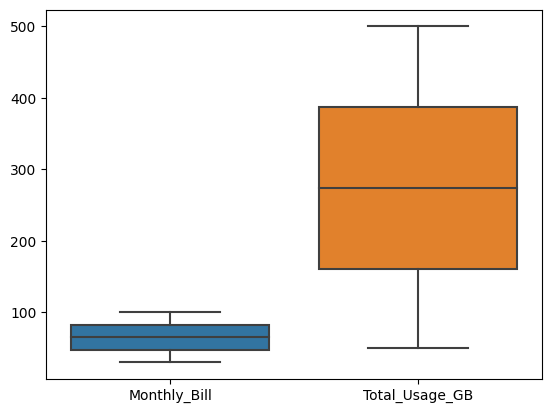

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['Monthly_Bill', 'Total_Usage_GB']])
plt.show()


In [5]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


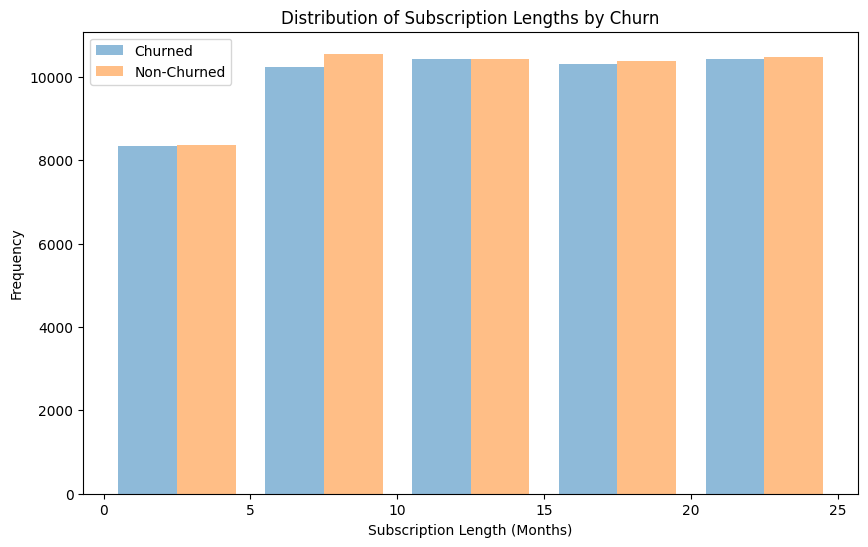

In [6]:
bins = list(range(0, 26, 5))


churned_data = df[df['Churn'] == 1]
non_churned_data = df[df['Churn'] == 0]

plt.figure(figsize=(10, 6))
plt.hist([churned_data['Subscription_Length_Months'], non_churned_data['Subscription_Length_Months']],
         bins=bins, alpha=0.5, label=['Churned', 'Non-Churned'])
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Frequency')
plt.title('Distribution of Subscription Lengths by Churn')
plt.legend()
plt.xticks(bins)
plt.show()


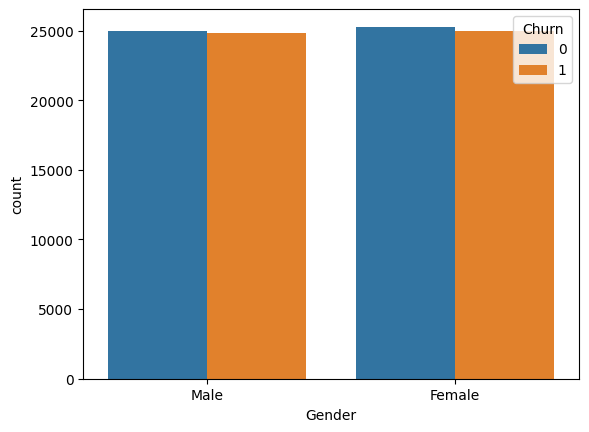

In [7]:
sns.countplot(data=df, x='Gender', hue='Churn')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


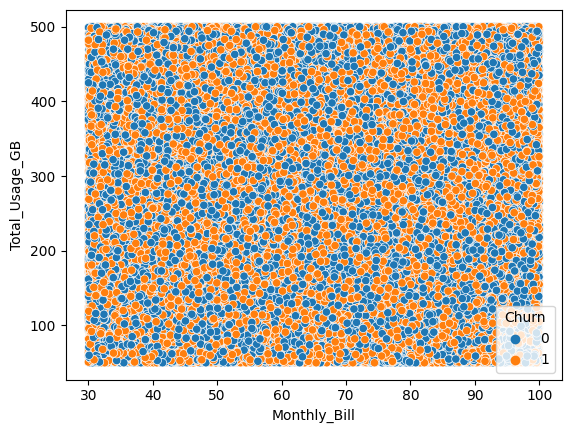

In [8]:

sns.scatterplot(data=df, x='Monthly_Bill', y='Total_Usage_GB', hue='Churn')
plt.show()


<ipython-input-9-523ffe861754>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


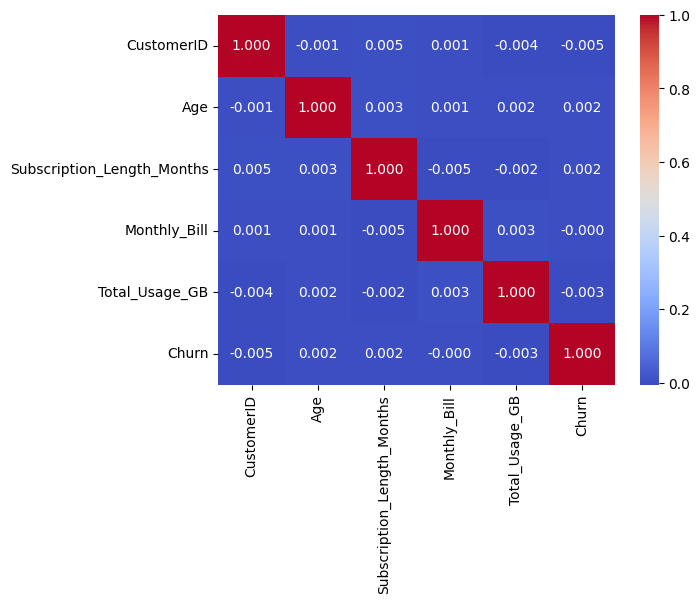

In [9]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".3f",cmap='coolwarm')
plt.show()

### Feature Engineering

In [10]:
age_bins = [0, 29, 59, df['Age'].max()]
age_labels = ['Young', 'Middle-aged', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_group_mapping = {'Young': 1, 'Middle-aged': 2, 'Senior': 3}
df['Age_Group_Encoded'] = df['Age_Group'].map(age_group_mapping)

print(df[['Age', 'Age_Group', 'Age_Group_Encoded']])


       Age    Age_Group Age_Group_Encoded
0       63       Senior                 3
1       62       Senior                 3
2       24        Young                 1
3       36  Middle-aged                 2
4       46  Middle-aged                 2
...    ...          ...               ...
99995   33  Middle-aged                 2
99996   62       Senior                 3
99997   64       Senior                 3
99998   51  Middle-aged                 2
99999   27        Young                 1

[100000 rows x 3 columns]


In [11]:
usage_bins = [0, 200, 350, df['Total_Usage_GB'].max()]
usage_labels = ['Low', 'Average', 'High']

df['Usage_Group'] = pd.cut(df['Total_Usage_GB'], bins=usage_bins, labels=usage_labels)

usage_group_mapping = {'Low': 1, 'Average': 2, 'High': 3}
df['Usage_Group_Encoded'] = df['Usage_Group'].map(usage_group_mapping)

print(df[['Total_Usage_GB', 'Usage_Group', 'Usage_Group_Encoded']])

       Total_Usage_GB Usage_Group Usage_Group_Encoded
0                 236     Average                   2
1                 172         Low                   1
2                 460        High                   3
3                 297     Average                   2
4                 266     Average                   2
...               ...         ...                 ...
99995             226     Average                   2
99996             351        High                   3
99997             251     Average                   2
99998             434        High                   3
99999             173         Low                   1

[100000 rows x 3 columns]


In [12]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])


In [14]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Age_Group_Encoded,Usage_Group,Usage_Group_Encoded,Location_Encoded,Gender_Encoded
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,Senior,3,Average,2,2,1
1,2,Customer_2,62,Female,New York,1,48.76,172,0,Senior,3,Low,1,4,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,Young,1,High,3,2,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,Middle-aged,2,Average,2,3,0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,Middle-aged,2,Average,2,3,0


In [15]:
churn_df = df[df['Churn'] == 1]

In [16]:
churn_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Encoded,Gender_Encoded
count,49779.000000,49779.000000,49779.000000,49779.000000,49779.000000,49779.0,49779.000000,49779.000000
mean,49867.537918,44.050945,12.506298,65.048903,274.021294,1.0,2.004922,0.498905
std,28894.477986,15.271592,6.934943,20.282146,130.427855,0.0,1.415022,0.500004
min,4.000000,18.000000,1.000000,30.000000,50.000000,1.0,0.000000,0.000000
25%,24853.500000,31.000000,7.000000,47.520000,161.000000,1.0,1.000000,0.000000
50%,49905.000000,44.000000,13.000000,64.950000,274.000000,1.0,2.000000,0.000000
75%,74931.500000,57.000000,19.000000,82.690000,386.000000,1.0,3.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.0,4.000000,1.000000


In [17]:
non_churn_df = df[df.Churn == 0]
non_churn_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Encoded,Gender_Encoded
count,50221.000000,50221.000000,50221.000000,50221.000000,50221.000000,50221.0,50221.000000,50221.000000
mean,50132.291870,44.003305,12.474045,65.057453,274.762729,0.0,1.986838,0.496784
std,28840.731801,15.289008,6.918075,20.179770,130.498201,0.0,1.408233,0.499995
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.0,0.000000,0.000000
25%,25146.000000,31.000000,6.000000,47.560000,161.000000,0.0,1.000000,0.000000
50%,50129.000000,44.000000,12.000000,65.060000,275.000000,0.0,2.000000,0.000000
75%,75064.000000,57.000000,18.000000,82.580000,388.000000,0.0,3.000000,1.000000
max,99997.000000,70.000000,24.000000,100.000000,500.000000,0.0,4.000000,1.000000


In [18]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Encoded,Gender_Encoded
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790,1.995840,0.497840
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998,1.411638,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000,0.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000,1.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000,2.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000,3.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000,4.000000,1.000000


In [19]:
df['Subscription_Payment'] = df['Subscription_Length_Months'] * df['Monthly_Bill']

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = df[['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Subscription_Payment']]

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

normalized_features = min_max_scaler.fit_transform(numerical_features)

normalized_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)

normalized_df.head()



,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Subscription_Payment
0,0.865385,0.695652,0.619429,0.413333,0.513644
1,0.846154,0.000000,0.268000,0.271111,0.007892
2,0.115385,0.173913,0.792429,0.911111,0.167671
3,0.346154,0.086957,0.970571,0.548889,0.111317
4,0.538462,0.782609,0.402000,0.480000,0.453521


### Model Processing

In [37]:
tempdf = df

In [38]:
features = list(normalized_df.columns)

for i in tempdf.columns:
  if i in features:
    tempdf[i] = normalized_df[i]


tempdf
col_drop = ['CustomerID','Name','Usage_Group','Age_Group','Location','Gender']

tempdf = tempdf.drop(columns = col_drop)
tempdf

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group_Encoded,Usage_Group_Encoded,Location_Encoded,Gender_Encoded,Subscription_Payment
0,0.865385,0.695652,0.619429,0.413333,0,3,2,2,1,0.513644
1,0.846154,0.000000,0.268000,0.271111,0,3,1,4,0,0.007892
2,0.115385,0.173913,0.792429,0.911111,0,1,3,2,0,0.167671
3,0.346154,0.086957,0.970571,0.548889,1,2,2,3,0,0.111317
4,0.538462,0.782609,0.402000,0.480000,0,2,2,3,0,0.453521
...,...,...,...,...,...,...,...,...,...,...
99995,0.288462,0.956522,0.359000,0.391111,1,2,2,1,1,0.522452
99996,0.846154,0.782609,0.452143,0.668889,0,3,3,4,0,0.481667
99997,0.884615,0.695652,0.944429,0.446667,1,3,2,0,1,0.676867
99998,0.634615,0.826087,0.275000,0.853333,1,2,3,4,0,0.403020


In [27]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

selected_features = ['Age_Group_Encoded', 'Total_Usage_GB','Subscription_Payment']
target_variable = 'Churn'

X = tempdf[selected_features].values
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49865
Confusion Matrix:
 [[7379 2700]
 [7327 2594]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.73      0.60     10079
           1       0.49      0.26      0.34      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



In [24]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

selected_features = ['Age', 'Monthly_Bill', 'Total_Usage_GB']
X = df[selected_features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[5647 4432]
 [5486 4435]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53     10079
           1       0.50      0.45      0.47      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [25]:
import xgboost as xgb
#XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Confusion Matrix:
 [[5309 4770]
 [5109 4812]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



In [31]:
#Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

selected_features = ['Age_Group_Encoded', 'Total_Usage_GB','Subscription_Payment']
target_variable = 'Churn'

X = tempdf[selected_features].values
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.50885
Confusion Matrix:
 [[5254 4825]
 [4998 4923]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.52      0.52     10079
           1       0.51      0.50      0.50      9921

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



In [26]:
#Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

selected_features = ['Age_Group_Encoded', 'Total_Usage_GB','Subscription_Payment']
target_variable = 'Churn'

X = tempdf[selected_features].values
y = df[target_variable].values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = SimpleNN(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test)
            y_pred = (y_pred >= 0.5).float()
            accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
            print(f"NN Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

precision = precision_score(y_test.numpy(), y_pred.numpy())
recall = recall_score(y_test.numpy(), y_pred.numpy())
f1 = f1_score(y_test.numpy(), y_pred.numpy())
cm = confusion_matrix(y_test.numpy(), y_pred.numpy())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(cm)

NN Epoch [10/250], Loss: 0.6940, Accuracy: 0.4969
NN Epoch [20/250], Loss: 0.6944, Accuracy: 0.4984
NN Epoch [30/250], Loss: 0.6936, Accuracy: 0.4974
NN Epoch [40/250], Loss: 0.6936, Accuracy: 0.4962
NN Epoch [50/250], Loss: 0.6934, Accuracy: 0.4952
NN Epoch [60/250], Loss: 0.6933, Accuracy: 0.4931
NN Epoch [70/250], Loss: 0.6932, Accuracy: 0.4950
NN Epoch [80/250], Loss: 0.6932, Accuracy: 0.4951
NN Epoch [90/250], Loss: 0.6931, Accuracy: 0.5014
NN Epoch [100/250], Loss: 0.6931, Accuracy: 0.5024
NN Epoch [110/250], Loss: 0.6931, Accuracy: 0.5004
NN Epoch [120/250], Loss: 0.6931, Accuracy: 0.5012
NN Epoch [130/250], Loss: 0.6931, Accuracy: 0.5008
NN Epoch [140/250], Loss: 0.6931, Accuracy: 0.5004
NN Epoch [150/250], Loss: 0.6931, Accuracy: 0.5002
NN Epoch [160/250], Loss: 0.6931, Accuracy: 0.4991
NN Epoch [170/250], Loss: 0.6931, Accuracy: 0.4993
NN Epoch [180/250], Loss: 0.6931, Accuracy: 0.4980
NN Epoch [190/250], Loss: 0.6931, Accuracy: 0.4978
NN Epoch [200/250], Loss: 0.6931, Accura

### Model Deployment

Since Models weren't yielding any accurate values for churn as the dataset seems to be very random and has little to no patterns in it even after feature engineering and all sorts of data processing. I opted for the Random Forest Classifier since it would be an ideal candidate for determining churn in actual datasets. Logistic Regression was also a good fit but this problem seems perfect for a Random Forest Classifier model


In [35]:
import pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)


In [47]:
with open('rf_model.pkl', 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

age = int(input("Enter Age: "))
total_usage_gb = float(input("Enter Total Usage in GB: "))
sub_months = int(input("Enter Number of Months :"))
monthly_bill = float(input("Enter Monthly Bill: "))

if age < 30:
  age_group = 1
elif age >= 30 and age < 60:
  age_group = 2
else:
  age_group = 3
total_usage_gb = (total_usage_gb - 50) / (500 - 50)
subscription_payment = sub_months * monthly_bill

user_input = {
    'Age_Group_Encoded': age_group,
    'Total_Usage_GB': total_usage_gb,
    'Subscription_Payment': subscription_payment
}

user_df = pd.DataFrame(user_input, index=[0])
user_prediction = loaded_rf_model.predict(user_df)

if user_prediction == 0:
    print("Predicted Churn: No")
else:
    print("Predicted Churn: Yes")


Enter Age: 23
Enter Total Usage in GB: 233
Enter Number of Months :25
Enter Monthly Bill: 72.33
Predicted Churn: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
